<span style="font-size:42px; "><strong>DATA Reduction </strong></span>

<hr>


# Intro

The purpose of this Notebook is to perform the Reduction pipeline for each samples (ie classified by dates) divided in 3 steps:
- DR1: Sanity Check Merging
- DR2: Baseline Correction
- DR3: Integration Normalisation

I learned Python during my PhD, starting from scratch and I have to confess, it was a mixed feeling experience all along. It looked very scary at first, was painfull most of the time but sometimes very satisfying and rewarding as well. All together, it is a great tool for analysing data and I will try to show you why, and teach you how to use it using a "real life example" by breaking down all the steps I took to perform the analysis of my own data set. 

***

For more information about the research itself (which I strongly recommend) have a look there: [Personal Web-site](www.include_later.com)  

***

$\color{blue}{\text{Teaching notes will be annoted in blue}}$, Enjoy the ride

## Workflow

$\color{blue}{\text{Jupyter, Donload Anaconda ...}}$

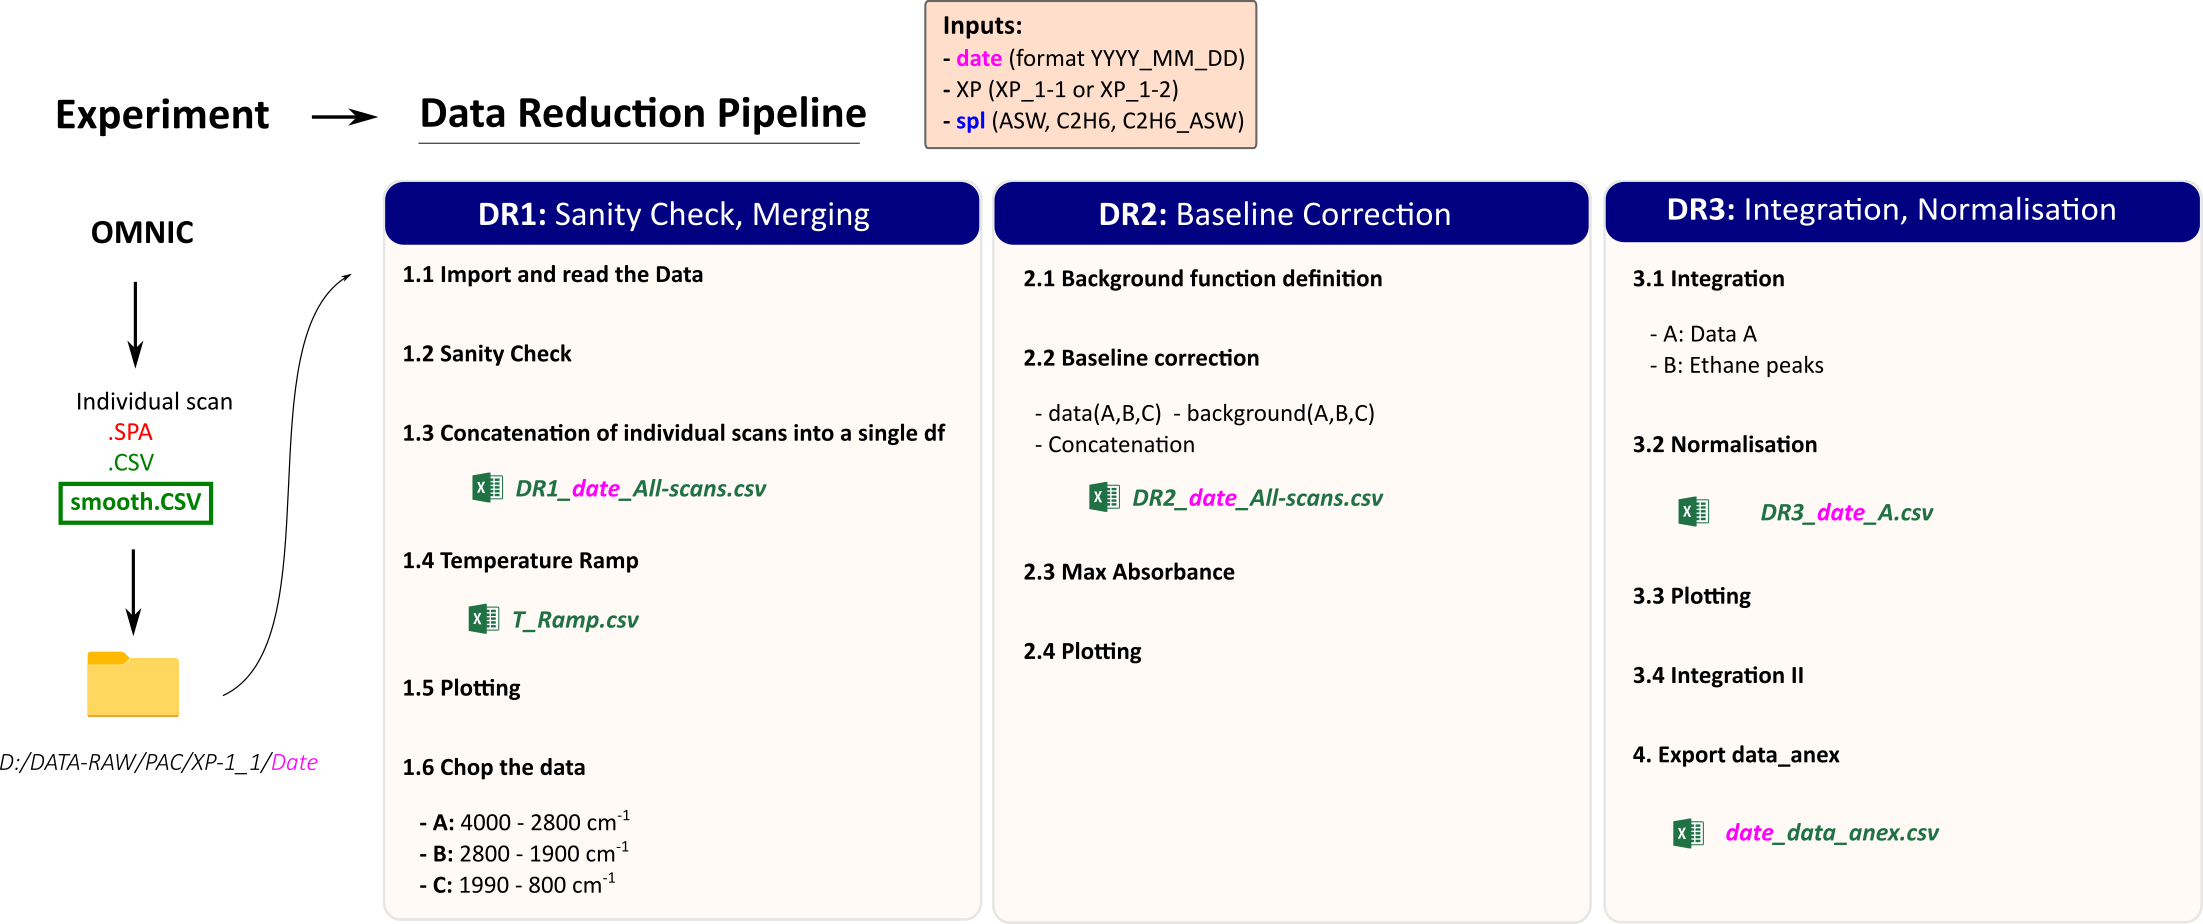

**Figure 1:** Workflow

### Libraries

$\color{blue}{\text{One of the greatest strength of Python reside in it`s collaborative nature ...}}$

In [2468]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from datetime import datetime
from IPython.core.display import SVG

%matplotlib inline


## Input parameters

One of the aim here is to input those parameters from a "master Notebook" allowing batch processing of multiple samples

$\color{blue}{\text{Variables (strings)}}$

`variable-name = string`

### Date

In [2469]:
date_jour = "2022_02_25"

### Experiment

In [2470]:
# 0.1 Date

date = "2021_05_13"

# 0.2 XP
    # Can take value XP_1-1, XP_1-2 

XP = "XP_1-1"

# 0.3 Sample type
    # Can take value ASW, C2H6, C2H6_ASW

spl = "ASW"

### Temperature Ramp

$\color{blue}{\text{Dictionary}}$ <br>

$\color{blue}{\text{key: value }}$

$\color{red}{\text{Implement manually !}}$

In [2471]:
T_ramp = []

In [2472]:
T_ramp.append(
        
        {
            'Sample' : str(spl),
            'Date' : str(date),
            '20' :  numpy.arange(1, 5, 1).tolist(),
            '30' : numpy.arange(5, 8, 1).tolist(),
            '40' : numpy.arange(8, 11, 1).tolist(),
            '50' : numpy.arange(11, 14, 1).tolist(),
            '60' : numpy.arange(14, 17, 1).tolist(),
            '70' : numpy.arange(17, 19, 1).tolist(),
            '80' : "",
            '90' : "",
            '100' : "",
            '110' :"",
            '120' : "",
            '125' : "",
            '130' : "",
            '132' : "",
            '134' : "",
            '135' : "",
            '136' : "",
            '137' : "",
            '138' : "",
            '140' : "",
            '142' : "",
            '145' : "",
            '150' :"",
            '155' : "",
            '160' : "",
            '180' : "",
            '200' : "",

            })

In [2473]:
#T_ramp

$\color{blue}{\text{Pandas library}}$

In [2474]:
T_ramp_df = pd.DataFrame(T_ramp)

T_ramp_df 

,Sample,Date,20,30,40,50,60,70,80,90,...,137,138,140,142,145,150,155,160,180,200
0,ASW,2021_05_13,"[1, 2, 3, 4]","[5, 6, 7]","[8, 9, 10]","[11, 12, 13]","[14, 15, 16]","[17, 18]",,,...,,,,,,,,,,


###  Append df to csv

We want to append T_ramp_df to XP_file.cvs, only if the date is not already present

Open XP_Ramp csv and create a df

In [2475]:
XP_Ramp_df = pd.read_csv('D:\DATA-Processing\PAC\XP_list_test.csv')

#XP_Ramp_df

What date are already present

In [2476]:
XP_Date = []

XP_Date = str(XP_Ramp_df['Date'])

#print(XP_Date)

Conditions that state if date already exist, don`t append, otherwise append T_ramp_df to XP_ramp_df

In [2477]:
if date in XP_Date:
    print("Not appended")
else:
    T_ramp_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv', mode='a', header=False, index=False)

Not appended


### Sanity Check 

In [2478]:
#XP_file_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv')

#XP_file_df

### T ramp for Reduction

#### Ramp

Purpose here is to produce a dictionnary where one scan is allocated to a Temperature for a rough processing within this Reduction Notebook.

$\color{red}{\text{Implement manually !}}$

In [2479]:
i = [0,1,5,8,830,833,841,844]
j = ["Dep","20","70","130","130*","140","140*","142"]


Tdictionary = dict(zip(j, i))

___Previous Dictionnaries___

Creating those dictionnary is a tedious process that, hence to prevent having to rewrite them each times we store them here as comments. However there is probaly a better method preventing a surcharge here (to implement) 

In [2480]:
#15-09 Sample 

#i = [0,1,2,3]
#j = ["20","130","140","160"]

#16-09 Sample 

#i = [0,1,4,7,10,13,16,19,22,25,28,30]
#j = ["Dep","20","40","60","80","100","120","130","140","160","180","200"]

#28-09

#i = [0,1,4,8,12,16,20,24,28,32,36,40,48,52,56,60,64,68,76,79]
#j = ["Dep","20","30","40","50","60","70","80","90","100","110","120","125","130","135","140","145","150","155","160",]

#17-09 and 21-09

#i = [0,1,4,7,10,13,16,19,22,25,27]
#j = ["Dep","20","40","60","80","100","120","130","140","160","180"]

#22-10

#i = [0,1,4,8,34,37,40,43,46,49,52,55,57,66]
#j = ["Dep","20","120","130", "130*", "132","134","136","138","140","142","145","150","150*"]

#16-11

#i = [0,1,4,6,17,18,41,45,49,51,63,66,68,88]
#j = ["Dep","20","60","70","70*","130","130*","136","137","138","138*","140","145","145*"]

#11-19

#i = [0,1,4,9,12,52,55,66,69,88,91,94,159]
#j = ["Dep","20","60","60*","70","70*","130","130*","135","135*","140","145","145*"]



#### Isotherm

$\color{red}{\text{Modify accordingly !}}$

In [2621]:
Iso = True

For specific samples, it is necessary to have the same approach as before but using Isotherm data. ie for one temperature specific scans are selected and included in a dictionnary where key is time (hour)

In [2622]:
Tiso1 = "130"

In [2681]:
k = [8,24,41,58,75,90,106,123,140,157,174,191,208,225,242,259,276,293,310,327,344,361,378,395,412,429,446,463,480,497,514,531,548,565,582,599,616,633,650,667,684,701,718,735,752,769,786]
l = ["0","4","8","12","16","20","24","28","32","36","40","44","48","52","56","60","64","68","72","76","80","84","88","92","96","100","104","108","112","116","120","124","128","132","136","140","144","148","152","156","160","164","168","172","176","180"]

#k = [8,12,16,20,24,28,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,90,94,98,102,106,110,114,118,122,125,129,133,137,141,145,149,153,157,161,165,169,173,177,181,185,189,193]
#l = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48"]

#k = [10,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800] 
#l = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

Isodic1 = dict(zip(l, k))

___Previous Dictionnaries___

In [2484]:
#10-22 130K

#k = [6,10,14,18,22,26,29,33]
#l = ["0","1","2","3","4","5","15","16"]

#11-16 130K

#k = [20,24,28,32,36,40]
#l = ["0","1","2","3","4","16"]

#11-19 145K

#k = [94,98,102,106,110,114,118,122,126,130,134,138,142,146,150,154,158]
#l = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

#11-19 135K

#k = [68,72,76,80,84,89]
#l = ["0","1","2","3","4","22"]


# <span style='background :yellow' > $\color{green}{\text{DR1 : Sanity Check and Merging}}$ </span>

I have one individual csv for each experimental scan (smoothed by omnic) called: ASW_2020_09_15_0001_smooth and located in the folder "D:\DATA-RAW\PAC\XP_1-1/2020_09_15/"   

Purpose :

- Import all the data 
- Create one data frame for each spectrum and add header (wavenumber, spectrum title)  
- merge all the data frame and create one big with (wavenumber, 0001, 0002, 0003, ...)
- Also during this phase a new csv will be created with various data that we aquired from the sample processing and named data_anex.csv

All the outputs generated will be located in the following folder: D:\DATA-Processing\PAC\XP_1-1\Samples\2020_09_15 and we expect two types of outputs:
- Data
- Plots


## <u>Import and read the data</u>

In [2485]:
file_path = "D:\DATA-RAW\PAC\{}/{}/*_smooth.csv".format(XP,date)

___Empty lists___

In [2486]:
# List within which all the individual scans will be added prior to merging
All_data_frame = []

# List where all the "data annex" (ie max absorbance ...), will be stored 
data_anex = []

#Temperature Ramp that the sample experienced (need to be entered manually later)
T_ramp = []

# Data annex values
data_max = []
minimum_1 = []
minimum_1_index = []
minimum_2 = []
minimum_2_index = []
minimum_3 = []
minimum_3_index = []
minimum_4 = []
minimum_4_index = []
minimum_5 = []
minimum_5_index = []
minimum_6 = []
minimum_6_index = []

maximum = []
maximum_index = []


___For loop___ 

Open all the individual files (df) and append to a list (All_data_frame) that will subsequently be transformed into a df.

Extract some informations for each sample: 
- min between 3 ranges
- max
that will subsequently be used for the remaining of the Data reduction pipeline and store it in data annex 



In [2487]:
# iterator

file_number = 1

#for loop

for file in glob.glob(file_path):

    df = pd.read_csv(file, names=["Wavenumber", str(spl)+"_"+str(date)+"_"+str(file_number)])
    
    All_data_frame.append(df) 

    #Min 4000 - 3800 wavenumber
    
    min1 = df.iloc[6223:6639,1].astype(float).min()
    min1_index= df.iloc[6223:6639,1].astype(float).idxmin()
    
    #Min 3000 - 2800 wavenumber
    
    min2 = df.iloc[4149:4564,1].astype(float).min()
    min2_index = df.iloc[4149:4564,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 1900 - 1800 wavenumber
    
    min5 = df.iloc[2075:2282,1].astype(float).min()
    min5_index= df.iloc[2075:2282,1].astype(float).idxmin()
    
    #Min 1300 - 800 wavenumber
    
    min6 = df.iloc[0:1038,1].astype(float).min()
    min6_index = df.iloc[0:1038,1].astype(float).idxmin()
    
    maxi = df.iloc[4149:6639,1].astype(float).max()
    maxi_index= df.iloc[4149:6639,1].astype(float).idxmax()
    

    #Wavenumber.append(Wav)    
    #RAW_data.append(RAW)
    
    minimum_1.append(min1)
    minimum_1_index.append(min1_index)
    
    minimum_2.append(min2)
    minimum_2_index.append(min2_index)
    
    minimum_3.append(min3)
    minimum_3_index.append(min3_index)
    
    minimum_4.append(min3)
    minimum_4_index.append(min3_index)
    
    minimum_5.append(min5)
    minimum_5_index.append(min5_index)
    
    minimum_6.append(min6)
    minimum_6_index.append(min6_index)
    
    maximum.append(maxi)
    maximum_index.append(maxi_index)
        
    data_anex.append(
        
        {

            'Name' : str(spl)+"_"+str(date)+"_" + str(file_number),
            'min1' : min1,
            'index1' :  min1_index,
            'min2' : min2,
            'index2' :  min2_index,
            'min3' : min3,
            'index3' :  min3_index,
            'min4' : min4,
            'index4' :  min4_index,
            'min5' : min5,
            'index5' :  min5_index,
            'min6' : min6,
            'index6' :  min6_index,
            'max' : maxi,
            'max_index' :  maxi_index,
        })
    


    
    file_number +=1

Should I had a new min range for ethane data ?

## <u>Sanity Check </u>

___All Data___

Check that the list has the same number of scans, and that every scan has 6639 rows

In [2488]:
All_data_frame

[      Wavenumber  ASW_2021_05_13_1
 0       799.8442          0.069635
 1       800.3264          0.069150
 2       800.8085          0.068547
 3       801.2906          0.066959
 4       801.7727          0.066662
 ...          ...               ...
 6634   3998.2570         -0.014595
 6635   3998.7390         -0.014566
 6636   3999.2210         -0.014556
 6637   3999.7030         -0.014677
 6638   4000.1850         -0.014722
 
 [6639 rows x 2 columns],
       Wavenumber  ASW_2021_05_13_2
 0       799.8442          0.070803
 1       800.3264          0.070645
 2       800.8085          0.070307
 3       801.2906          0.068691
 4       801.7727          0.068221
 ...          ...               ...
 6634   3998.2570         -0.013468
 6635   3998.7390         -0.013438
 6636   3999.2210         -0.013415
 6637   3999.7030         -0.013496
 6638   4000.1850         -0.013514
 
 [6639 rows x 2 columns],
       Wavenumber  ASW_2021_05_13_3
 0       799.8442          0.078662
 1      

___Data Annex___

In [2489]:
data_anex_df = pd.DataFrame(data_anex)

In [2490]:
data_anex_df.head(5)

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,index5,min6,index6,max,max_index
0,ASW_2021_05_13_1,-0.014722,6638,-0.004114,4151,-0.004143,4140,0.002053,2392,0.002395,2276,0.006344,477,0.268766,5120
1,ASW_2021_05_13_2,-0.013557,6630,-0.003223,4209,-0.003271,4140,0.002862,2392,0.003149,2276,0.006977,463,0.270903,5120
2,ASW_2021_05_13_3,-0.012140,6636,-0.002166,4153,-0.002128,4134,0.003635,2390,0.003998,2275,0.006063,496,0.320648,5101
3,ASW_2021_05_13_4,-0.011840,6636,-0.001680,4153,-0.001689,4134,0.004012,2447,0.004475,2273,0.006181,467,0.333521,5099
4,ASW_2021_05_13_5,-0.011791,6636,-0.001560,4153,-0.001565,4134,0.004190,2388,0.004680,2273,0.006330,467,0.336216,5099


##  <u>Concatenation </u>

Purpose here is to concatenate all the individual scans into 1 big df that will subsequently be converted into csv

In [2491]:
All_RAW_df = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [2492]:
pd.DataFrame(All_RAW_df)

,Wavenumber,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,799.8442,0.069635,0.070803,0.078662,0.081198,0.083307,0.082718,0.080604,0.081269,0.079710,...,0.090741,0.085825,0.081287,0.077290,0.073891,0.069322,0.066090,0.062483,0.058705,0.054788
1,800.3264,0.069150,0.070645,0.074942,0.078147,0.080280,0.079097,0.080174,0.082986,0.082341,...,0.089367,0.084261,0.079909,0.076536,0.072063,0.067917,0.064834,0.060181,0.057909,0.054084
2,800.8085,0.068547,0.070307,0.069735,0.073422,0.075741,0.073966,0.078301,0.082874,0.083144,...,0.087323,0.082613,0.077456,0.075329,0.069836,0.066021,0.062821,0.057683,0.056200,0.052589
3,801.2906,0.066959,0.068691,0.063575,0.065501,0.067977,0.066375,0.071228,0.072628,0.072857,...,0.085501,0.080906,0.075228,0.074134,0.068899,0.064946,0.061459,0.056413,0.054242,0.051109
4,801.7727,0.066662,0.068221,0.063871,0.064520,0.066492,0.065588,0.069532,0.067802,0.068290,...,0.083946,0.079877,0.074234,0.072727,0.067862,0.063550,0.060590,0.054940,0.052632,0.049710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.2570,-0.014595,-0.013468,-0.011945,-0.011508,-0.011431,-0.011053,-0.012358,-0.014378,-0.014626,...,-0.000744,0.001204,0.003410,0.005089,0.006522,0.008000,0.009461,0.010554,0.011220,0.011928
6635,3998.7390,-0.014566,-0.013438,-0.012043,-0.011675,-0.011610,-0.011223,-0.012435,-0.014550,-0.014809,...,-0.000754,0.001134,0.003363,0.005049,0.006494,0.007996,0.009412,0.010519,0.011210,0.011899
6636,3999.2210,-0.014556,-0.013415,-0.012140,-0.011840,-0.011791,-0.011443,-0.012548,-0.014743,-0.014998,...,-0.000700,0.001189,0.003468,0.005135,0.006592,0.008112,0.009524,0.010669,0.011322,0.012041
6637,3999.7030,-0.014677,-0.013496,-0.011767,-0.011123,-0.011118,-0.010725,-0.012519,-0.014141,-0.014470,...,-0.001103,0.000582,0.002855,0.004543,0.006026,0.007524,0.008920,0.010067,0.010718,0.011442


___CSV Export___

In [2493]:
All_RAW_df.to_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date,date))

## <u> Plotting </u>

848


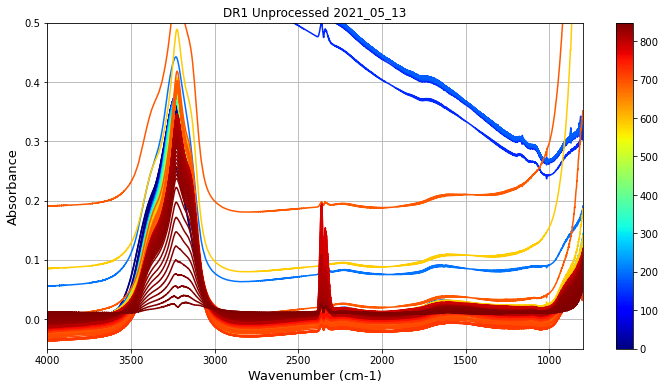

In [2494]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(12,6))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(All_RAW_df.Wavenumber, All_RAW_df['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR1 Unprocessed {0}'.format(date))
plt.axis([4000,800,-0.05,0.50])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR1_{}_Full-range.png'.format(XP, date, date))

plt.show()

## <u> Chop the data </u>

Data is choped in 3 range:
- A: OH stretch : (4000 - 2800 cm-1)
- B: Combination bands : (2800 - 1900 cm-1)
- C: Bending modes : (1900 - 800 cm-1)

If spl = C2H6 implement sub range for each peak:

$\color{blue}{\text{do we need to do that ?}}$

Yes because each baseline correction function will use the data within those ranges (there is probably a better solution there but for the moment that work quite well)

### 1.5.1 OH Stretch

In [2495]:
DR1_A_df = All_RAW_df[4149:6639]

#DR1_A_df

___Export as csv___

In [2496]:
#DR1_A_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_A.csv'.format(date))

### 1.5.2 Combination bands

In [2497]:
DR1_B_df = All_RAW_df[2282:4150]

#DR1_B_df

___Export as csv___

In [2498]:
#DR1_B_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_B.csv'.format(date))

### 1.5.3 bending modes

In [2499]:
DR1_C_df = All_RAW_df[0:2283]

#DR1_C_df

___Export as csv___

In [2500]:
#DR1_C_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_C.csv'.format(date))

# <span style='background :yellow' > $\color{green}{\text{DR2 : Baseline Correction}}$ </span>

One of the reason to perform all the reduction steps within the same notebook is that we can keep the previously created df all along. Also, the various outputs that are generated at the various reduction steps will be implemented into the same df (data_annex that will be converted to a csv at the end of the reduction). Here is a list of the df created so far:

- All_RAW_df
- T_ramp_df
- data_annex_df
- DR1_A_df
- DR1_B_df
- DR1_C_df

The purpose of this section is to perform a Baseline correction for each of the previously chopped data before to concatenate them in a fully baseline corrected df

___Empty List___

In [2501]:
maxA = []
maxAi = []

___Data check___

In [2502]:
#DR1_A_df

In [2503]:
#All_RAW_df

## <u>Background function definition </u>

### Minimum (single point) within a range

Here we select a minimum within a predefined range (stored in data_annex). 


Idea for latter: Try to not select an individual point as minimum but a local minimum with a rolling average

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [2504]:
#DR1_A_df

In [2505]:
# We supress the first column (Wavenumber)

DR1_A_df = DR1_A_df.T.iloc[1:].T
DR1_B_df = DR1_B_df.T.iloc[1:].T
DR1_C_df = DR1_C_df.T.iloc[1:].T

# Now compute a new DataFrame indexed by the file names with rows that contain the
# minimum value and the index of that minimum value within specific row ranges
# of the column in data corresponding to the filename.
dataStats = pd.DataFrame.from_dict(
  dict(min1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].min(axis=0), # min within rows 6000 - end
       mini1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].idxmin(axis=0), # index of that min
       min2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].min(axis=0), # min within rows 4000 - 5000
       mini2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].idxmin(axis=0), # index of that min
       min3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].min(axis=0), # min within rows 2282 - 2697
       mini3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].idxmin(axis=0), # index of that min
       min4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].min(axis=0), # min within rows 415 - 830
       mini4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].idxmin(axis=0), # index of that min   
       min5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].min(axis=0), # min within rows 2282 - 2697
       mini5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].idxmin(axis=0), # index of that min
       min6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].min(axis=0), # min within rows 415 - 830
       mini6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].idxmin(axis=0), # index of that min   
        )
    
)

# select average around minimum value 

#.rolling(4).mean()



# Breaking down what's happening in:
# `data.T.iloc[1:].T.iloc[6000:6800].min(axis=0)`
# 1) `data.T.iloc[1:].T` - This is a cheeky way of stripping away the first column, "Wavenumber",
# 1a) `data.T`, transposes the frame i.e. switches rows and columns
# 1b) `.iloc[1:]` selects all but the first row (previously all but the first column).
# 1c) The final `.T` switches rows and columns back again.
# 2) `.iloc[6000:6800]` selects rows at *positions* between 6000 and 6800. We now have a 
# 2D block of data.
# 3) `.min(axis=0)` computes the column-wise minima of the 2D block we just selected, to 
# give us a 1D Series of numbers.
# 3.1) On the next line, `.idxmin(axis=0)` computes the column-wise index of the minimum for 
# the 2D block we just selected, to give us a 1D Series of index locations.

# We want to subtract a linear function from each column in data, that will
# connect the minimum values in the two ranges. 
# We'll use the `apply` method of pd.DataFrame to do that.
# Apply operates on rows (or columns if the argument axis is set to 0) of a Dataframe to 
# compute a function on the elements of that whole row or column.
#
# We'll define the function that we want to compute.
# The first argument is the column or row data themselves and we are free to 
# provide other data that we need to compute out function.
def computeLinearBackground1(values,     # The column values (e.g. Y)
                            waveNumber, # The corresponding wavenumbers (e.g. X)
                            valueStats  # The dataframe containing the minima and their 
                                        # indices for each file
                 ):
    # extract the correct set of minima using the `name` attribute of the `values` series
    # to index the `valueStats` frame.
    stats = valueStats.loc[values.name, :]
    # compute a linear background function
    gradient = ((stats.min1 - stats.min2)/(stats.mini1 - stats.mini2))
    intercept = stats.min1 - stats.mini1*gradient
    linearBackground1 = (gradient * waveNumber.index) + intercept
    # subtract that function from the column values
    return linearBackground1

def computeLinearBackground2(values,    
                            waveNumber, 
                            valueStats  
                                        
                 ):

    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min3 - stats.min4)/(stats.mini3 - stats.mini4))
    intercept = stats.min3 - stats.mini3*gradient
    linearBackground2 = (gradient * waveNumber.index) + intercept
    return linearBackground2



def computeLinearBackground3(values,   
                            waveNumber, 
                            valueStats  
                 ):
    
    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min5 - stats.min6)/(stats.mini5 - stats.mini6))
    intercept = stats.min5 - stats.mini5*gradient
    linearBackground3 = (gradient * waveNumber.index) + intercept
    return linearBackground3

# Finally apply our function to the columns of the dataframe (except the wavenumber column)
# We specify axis=0 to operate on the columns (confusingly this is referred to as *along*
# the index direction in the docs), and pass the first (wavenumber) column and the summary 
# statistics dataframe, wrapped in a tuple, as the `args` argument.
backgroundsA = DR1_A_df.T.iloc[0:].T.apply(computeLinearBackground1, axis=0, args=(DR1_A_df.T.iloc[0], dataStats))
backgroundsB = DR1_B_df.T.iloc[0:].T.apply(computeLinearBackground2, axis=0, args=(DR1_B_df.T.iloc[0], dataStats))
backgroundsC = DR1_C_df.T.iloc[0:].T.apply(computeLinearBackground3, axis=0, args=(DR1_C_df.T.iloc[0], dataStats))


In [2506]:
#DR1_A_df

In [2507]:
#min1

###  Minimum within a range + Smoothing

$\color{red}{\text{In the making - not ready}}$ 

https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html

In [2508]:
def smooth(x,window_len=5,window='flat'):
    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    w=numpy.ones(window_len,'d')
    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [2509]:
min1B = All_RAW_df.T.iloc[1].T.iloc[6223:6639]

In [2510]:
#min1B

In [2511]:
#for x in min1B:
#    print(x)
#    z = smooth(x,window_len=5,window='flat')

In [2512]:
#print(z)

 $\color{red}{\text{To perform with a single value and not a range}}$ 

### Minimum Using single value (same for all scans)

 $\color{red}{\text{Is it worth doing ?}}$ 

Check the difference between those different baseline correction method

## <u>Baseline correction</u>

### data - background subtraction 

####  ASW

Previous step produced a background for each data range (A,B,C). We will now substract this background to the data and create new BC Data frame. 

In [2513]:
dataA_BC = pd.DataFrame(DR1_A_df - backgroundsA)
dataB_BC = pd.DataFrame(DR1_B_df - backgroundsB)
dataC_BC = pd.DataFrame(DR1_C_df - backgroundsC)


In [2514]:
#dataA_BC

#### Ethane samples

 $\color{red}{\text{If Ethane Different baseline nedd to be fitted - polynomial}}$ <br>
 
 https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#using-radial-basis-functions-for-smoothing-interpolation
 
 New range nedd to be created
 
 $\color{red}{\text{If Ethane implement sub range to extract max A for each peak}}$

if statement for sample = C2H6

___Run specific notebook___

In [2515]:
if spl == "C2H6":

    %run -i "test1.py"

elif spl == "C2H6_ASW":
    
    %run -i "test1.py"
    
elif spl == "ASW":
    
    print('its OK bro, carry on')
    
    %run -i "test1.py"
 

its OK bro, carry on
Hello world
      ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  ASW_2021_05_13_4  \
4149      2.762011e-05         -0.000215          0.000203      2.343479e-04   
4150      1.295855e-05         -0.000226          0.000212      2.439467e-04   
4151     -8.673617e-19         -0.000228          0.000025      6.661646e-05   
4152      3.979145e-05         -0.000179          0.000101      1.163832e-04   
4153      6.790689e-05         -0.000150          0.000000     -1.517883e-18   
...                ...               ...               ...               ...   
6634      1.102582e-04          0.000106          0.000186      3.244365e-04   
6635      1.431737e-04          0.000140          0.000092      1.609282e-04   
6636      1.574191e-04          0.000168          0.000000      0.000000e+00   
6637      4.102455e-05          0.000091          0.000377      7.211818e-04   
6638      0.000000e+00          0.000077          0.000872      1.604154e-03   

      

<Figure size 432x288 with 0 Axes>

### Cleaning and Sanity Check

We reinsert the Wavenumber that was removed prior to the baseline function aplied

In [2516]:
dataA_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataB_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataC_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

backgroundsA.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsB.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

In [2517]:
#dataA_BC

In [2518]:
#backgroundsA

#### Concatenation

In [2519]:
All_data_A = dataC_BC.append(dataB_BC)

In [2520]:
All_data_BC = All_data_A.append(dataA_BC)

In [2521]:
#All_data_BC

#### Export as csv

In [2522]:
All_data_BC.to_csv('D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR2_{}_All-scans.csv'.format(XP, date, date))

## <u>Max Absorbance</u>

A first step in our analysis is to extract and use the maximum absorbance in order to make a first comparison of the frequency shifts with respect to temperature for each sample.

### Preliminary steps

####  Range B

For range B (combination modes), we need to supress the CO2 signature (that would otherwise contribute to the max A value for this range). As a first guess we aim to supress data from 2390 to 2290 wavenumber

___Find index based on column value___

In [2523]:
#dataB_BC[(dataB_BC['Wavenumber'] > 2388) & (dataB_BC['Wavenumber'] < 2392)].index.tolist()

In [2524]:
#dataB_BC.loc[3299, 'Wavenumber']

___Supress data within a specified range___

Create a new dataframe where the datapoints corresponding to the absorbtion of CO2 is suppressed. (value are different than the one above because the index was reinitialised (simple substraction do the trick))

In [2525]:
dataB_BC_U = dataB_BC.drop(dataB_BC.index[808:1016])

In [2526]:
#dataB_BC_U

####  Range C

Concerning range C, we are only aiming for the maximum absorbance of the bending modes but the libration modes have a contribution more important. However the peak is incomplete and we need to supress it. <br>
Same approach as previously will be used and we aim to cut the data at wavenumber = 1040 cm-1

In [2527]:
#dataC_BC[(dataC_BC['Wavenumber'] > 1038) & (dataC_BC['Wavenumber'] < 1042)].index.tolist()

In [2528]:
dataC_BC_U = dataC_BC.drop(dataC_BC.index[0:498])

In [2529]:
#dataC_BC_U

###  Extract max A

Here we look for 4 maximum:
- two for the range A (1 with the baseline corrected scan and one from the unreduced data, to check that they concord and that the reduction routine does not affect the spectral signature)
- one for range B (using dataB_BC_U that excude the CO2 signature)
- one for range C (using dataC_BC_U that excude the libration modes)

In [2530]:
#Data max from unreduced data in range A 

dataA_Max = pd.DataFrame.from_dict(
  dict(maxA0=DR1_A_df.T.iloc[0:].T.iloc[0:].max(axis=0), # min within rows 6000 - end
       maxA0i=DR1_A_df.T.iloc[0:].T.iloc[0:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range A 

dataA_BC_Max = pd.DataFrame.from_dict(
  dict(maxA=dataA_BC.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxAi=dataA_BC.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range B

dataB_BC_Max = pd.DataFrame.from_dict(
  dict(maxB=dataB_BC_U.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxBi=dataB_BC_U.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range C

dataC_BC_Max = pd.DataFrame.from_dict(
  dict(maxC=dataC_BC_U.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxCi=dataC_BC_U.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)




In [2531]:
dataA_BC_Max

,maxA,maxAi
ASW_2021_05_13_1,0.277013,5120
ASW_2021_05_13_2,0.278015,5120
ASW_2021_05_13_3,0.326622,5101
ASW_2021_05_13_4,0.339073,5099
ASW_2021_05_13_5,0.341674,5099
...,...,...
ASW_2021_05_13_843,0.090173,5041
ASW_2021_05_13_844,0.066360,5047
ASW_2021_05_13_845,0.045071,5051
ASW_2021_05_13_846,0.028592,4941


In [2532]:
#dataA_Max

### Clean 

Describe

In [2533]:
wavelength = All_RAW_df.T.iloc[0]

# A DR2

dataA_BC_Max = dataA_BC_Max.reset_index()
dataA_BC_Max['Name'] = dataA_BC_Max['index']
dataA_BC_Max = dataA_BC_Max.T.iloc[1:].T

dataA_BC_Max1 = dataA_BC_Max.set_index('maxAi',drop=True)
dataA_BC_Max2 = dataA_BC_Max1.join(wavelength, on='maxAi')
dataA_BC_Max2 = dataA_BC_Max2.reset_index()
dataA_BC_Max_F = dataA_BC_Max2.set_index(dataA_BC_Max.index)
dataA_BC_Max_F.rename(columns={'Wavenumber': 'maxAw'}, inplace=True)

# A DR1

dataA_Max = dataA_Max.reset_index()
dataA_Max['Name'] = dataA_Max['index']
dataA_Max = dataA_Max.T.iloc[1:].T

dataA_Max1 = dataA_Max.set_index('maxA0i',drop=True)
dataA_Max2 = dataA_Max1.join(wavelength, on='maxA0i')
dataA_Max2 = dataA_Max2.reset_index()
dataA_Max_F = dataA_Max2.set_index(dataA_Max.index)
dataA_Max_F.rename(columns={'Wavenumber': 'maxA0w'}, inplace=True)

# B DR2



dataB_BC_Max = dataB_BC_Max.reset_index()
dataB_BC_Max['Name'] = dataB_BC_Max['index']
dataB_BC_Max = dataB_BC_Max.T.iloc[1:].T

dataB_BC_Max1 = dataB_BC_Max.set_index('maxBi',drop=True)
dataB_BC_Max2 = dataB_BC_Max1.join(wavelength, on='maxBi')
dataB_BC_Max2 = dataB_BC_Max2.reset_index()
dataB_BC_Max_F = dataB_BC_Max2.set_index(dataB_BC_Max.index)
dataB_BC_Max_F.rename(columns={'Wavenumber': 'maxBw'}, inplace=True)

# C DR2

dataC_BC_Max = dataC_BC_Max.reset_index()
dataC_BC_Max['Name'] = dataC_BC_Max['index']
dataC_BC_Max = dataC_BC_Max.T.iloc[1:].T

dataC_BC_Max1 = dataC_BC_Max.set_index('maxCi',drop=True)
dataC_BC_Max2 = dataC_BC_Max1.join(wavelength, on='maxCi')
dataC_BC_Max2 = dataC_BC_Max2.reset_index()
dataC_BC_Max_F = dataC_BC_Max2.set_index(dataC_BC_Max.index)
dataC_BC_Max_F.rename(columns={'Wavenumber': 'maxCw'}, inplace=True)

In [2534]:
#dataA_Max_F

___Insert column scan number___ 

to be able to link data_annex with XP_Ramp_df

In [2535]:
nscan = len(list(dataA_BC_Max_F.index.values.tolist()))
scan_number = pd.Series(range(1,nscan+1))
scan_number.astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
842    843
843    844
844    845
845    846
846    847
Length: 847, dtype: int32

In [2536]:
dataA_BC_Max_F['scan_number'] = scan_number

In [2537]:
#dataA_BC_Max_F

In [2538]:
#dataB_BC_Max_F

In [2539]:
#dataC_BC_Max_F

___Insert column Time stamp ?___

add time stamp for scan where interuption of T ramp 

2 time stamp:
- real time
- relative time

Check the possibility for input type implementation

[Slack Overflow time stamp insertion](https://stackoverflow.com/questions/36932759/pandas-adding-new-column-to-dataframe-which-is-a-copy-of-the-index-column)

create two empty column type datetime

May be best to implement in excell when need be

In [2540]:
#data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")

In [2541]:
#data_anex_df


Find a way to display entirely and scroll within 



 $\color{red}{\text{Implement Observation on lab-book}}$
 
  - Max A 

In [2542]:
#data_anex_df['Real_T'] = scan_number

In [2543]:
#dt_string = "{}_"+str(input('Enter date(hh-mm): ')).format(date)


In [2544]:
#dt_string

In [2545]:
#dt_object1 = datetime.strptime(dt_string, "%Y_%m_%d_%H%M")
#print("dt_object1 =", dt_object1)


###  Append to data Annex

In [2546]:
#data_anex_df

In [2547]:
data_anex_df = pd.merge(data_anex_df, dataA_BC_Max_F, on="Name")

In [2548]:
data_anex_df = pd.merge(data_anex_df, dataA_Max_F, on="Name")

In [2549]:
data_anex_df = pd.merge(data_anex_df, dataB_BC_Max_F, on="Name")

In [2550]:
data_anex_df = pd.merge(data_anex_df, dataC_BC_Max_F, on="Name")

In [2551]:
#data_anex_df 

## <u>Plotting</u> 

### Full range 

In [2552]:
nscan = len(list(dataA_BC.columns.values.tolist()))

ymax =   data_anex_df.iloc[1:,16].astype(float).max()
ymin =   data_anex_df.iloc[1:,16].astype(float).min()
ymax2 = ymax + 0.01
ymin2 = ymin - 0.01 

848


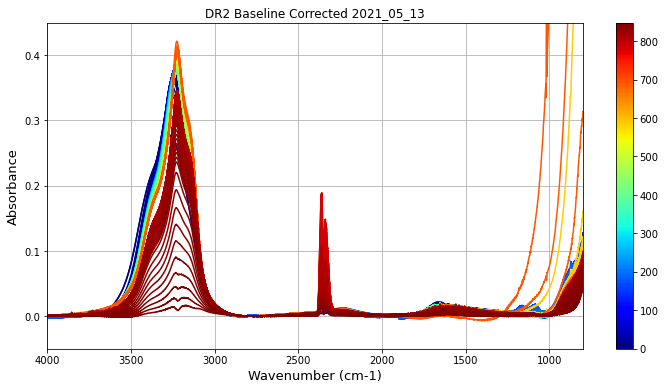

In [2553]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(12,6))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(All_data_BC.Wavenumber, All_data_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR2 Baseline Corrected {0}'.format(date))
plt.axis([4000,800,-0.05,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

#plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_Full-range.png'.format(XP, date, date))

plt.show()

###  Oh stretch

#### Baseline correction

Insert in legend parameters of BC from data_annex

In [2554]:
nscan = len(list(dataA_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataA_BC.columns[1:]):
    panel.plot(dataA_BC.Wavenumber, dataA_BC[column], label="data")
    panel.plot(dataA_BC.Wavenumber, backgroundsA[column], ls="dashed",  label="bg")

    panel.plot(dataA_BC.Wavenumber, dataA_BC[column]+ backgroundsA[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()
    
    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_BCA.png'.format(XP, date, date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x152640 with 848 Axes>

####  All scans 

(using scan number - All data)
<br>
Idea for later : plot OH and maxA together

[Marker modification](https://matplotlib.org/stable/api/markers_api.html)

848


No handles with labels found to put in legend.


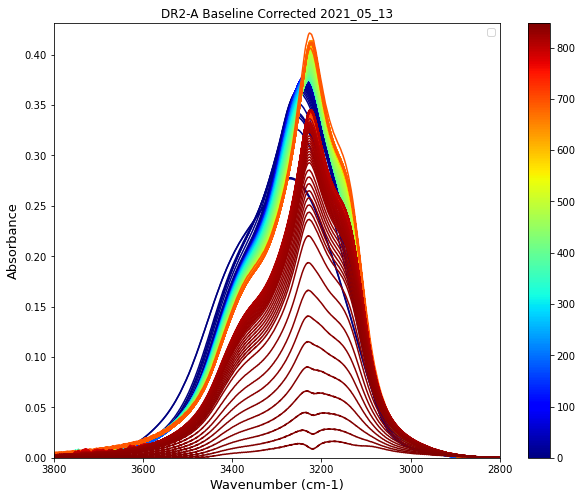

In [2555]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(10,8))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(dataA_BC.Wavenumber, dataA_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR2-A Baseline Corrected {0}'.format(date))
plt.axis([3800,2800,0,ymax2])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_A.png'.format(XP, date, date))

plt.show()

#### 2.4.A.4b All scans (using dictionnary vale - discrete T)

later

#### 2.4.A.4 Max Absorbance (peak frequency shift) - Clean

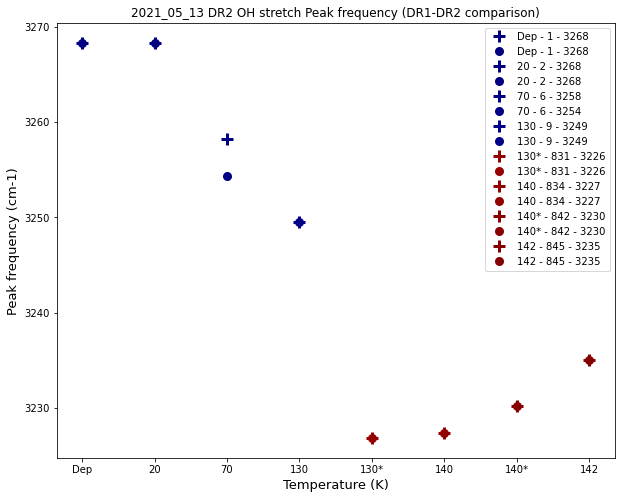

In [2556]:
fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():

    plt.plot(keys, data_anex_df.iloc[values,17], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,17])))
    plt.plot(keys, data_anex_df.iloc[values,21], '.', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,21])))

plt.title('{0} DR2 OH stretch Peak frequency (DR1-DR2 comparison)'.format(date))
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()


plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-frequency_wA0.png'.format(XP, date, date))

plt.show()

#### 2.4.A.5 Max Absorbance (peak frequency shift) - Isotherm 1

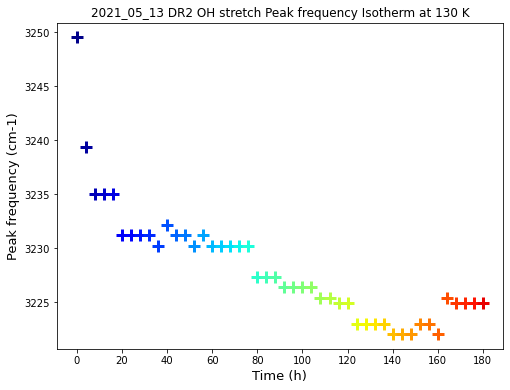

In [2685]:
if Iso == True:

    fig = plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,17], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,17])))
        
    plt.title('{0} DR2 OH stretch Peak frequency Isotherm at {1} K'.format(date,Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))    
    #plt.grid()
    #plt.legend()


    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-frequency_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()

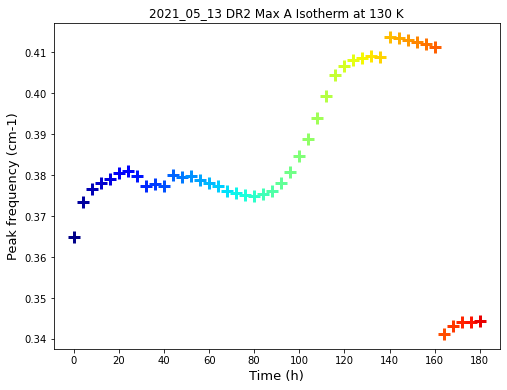

In [2686]:
if Iso == True:

    fig = plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,16], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,17])))
        
    plt.title('{0} DR2 Max A Isotherm at {1} K'.format(date,Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))    
    #plt.grid()
    #plt.legend()


    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_max_A_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()

###  2.4.B Comb Bands

#### 2.4.B.1 Baseline correction

In [2558]:
nscan = len(list(dataB_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(10, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataB_BC.columns[1:]):
    panel.plot(dataB_BC.Wavenumber, dataB_BC[column], label="data")
    panel.plot(dataB_BC.Wavenumber, backgroundsB[column], ls="dashed",  label="bg")

    panel.plot(dataB_BC.Wavenumber, dataB_BC[column] + backgroundsB[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.set_title(column)
    panel.invert_xaxis()
    panel.legend()
    
    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_BCB.png'.format(XP, date, date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 720x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 720x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x152640 with 848 Axes>

#### 2.4.B.2 Backgrounds

#### 2.4.B.3 All scans

848


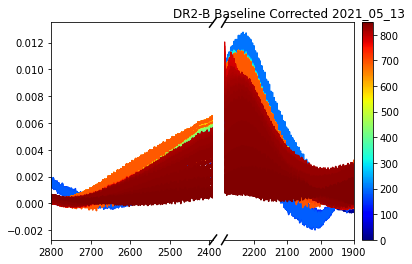

In [2559]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


f,(ax,ax2) = plt.subplots(1,2,sharey=True)



normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet

i=1

for i in range(1,nscan):
    
    ax.plot(dataB_BC_U.Wavenumber, dataB_BC_U['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    ax2.plot(dataB_BC_U.Wavenumber, dataB_BC_U['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

ax.set_xlim(2800,2390)
ax2.set_xlim(2290,1900)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.set_visible(False)

d = .022 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

f.subplots_adjust(wspace=.070)

plt.title('DR2-B Baseline Corrected {0}'.format(date))
#plt.axis([2800,1900,0,0.015])
#plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
#plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_B.png'.format(XP, date, date))

plt.show()

#### 2.4.B.4 Max A + Redshift

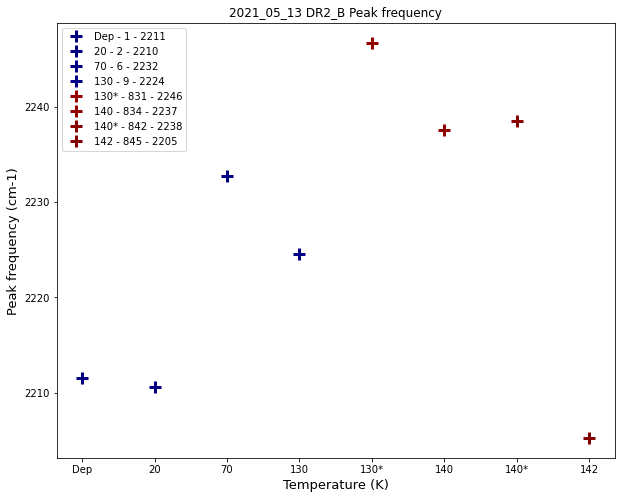

In [2560]:
fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():

    plt.plot(keys, data_anex_df.iloc[values,24], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,24])))
    #plt.plot(keys, data_anex_df.iloc[values,21], '.', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,21])))

plt.title('{0} DR2_B Peak frequency'.format(date))
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()


plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakB-frequency.png'.format(XP, date, date))

plt.show()

###  2.4.C Bending

#### 2.4.B.1 Baseline correction

In [2561]:
nscan = len(list(dataC_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataC_BC.columns[1:]):
    panel.plot(dataC_BC.Wavenumber, dataC_BC[column], label="data")
    panel.plot(dataC_BC.Wavenumber, backgroundsC[column], ls="dashed",  label="bg")

    panel.plot(dataC_BC.Wavenumber, dataC_BC[column]+ backgroundsC[column], ls="dotted",  label="data+bg")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()
    
    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_BCC.png'.format(XP, date, date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x152640 with 848 Axes>

#### 2.4.B.2 Backgrounds

#### 2.4.B.3 All scans

In [2562]:
nscan = len(list(dataC_BC.columns.values.tolist()))

ymax =   data_anex_df.iloc[1:,23].astype(float).max()
ymin =   data_anex_df.iloc[1:,23].astype(float).min()
ymax2 = ymax + 0.005
ymin2 = ymin - 0.01 

848


No handles with labels found to put in legend.


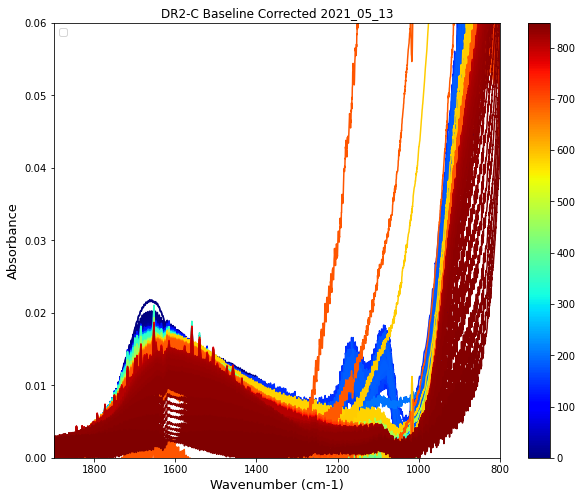

In [2563]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(10,8))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(dataC_BC.Wavenumber, dataC_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR2-C Baseline Corrected {0}'.format(date))
plt.axis([1900,800,0,0.06])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_C.png'.format(XP, date, date))

plt.show()

Plot the unreduced (BC) scans to see if a polynomial would be better

848


No handles with labels found to put in legend.


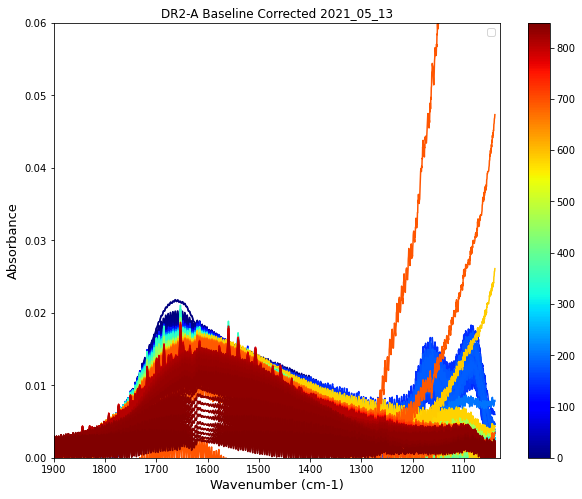

In [2564]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(10,8))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(dataC_BC_U.Wavenumber, dataC_BC_U['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR2-A Baseline Corrected {0}'.format(date))
plt.axis([1900,1030,0,0.06])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_C_U.png'.format(XP, date, date))

plt.show()

#### 2.4.B.4 Max A + Redshift

#### 2.4.B.4 Max A, per temperature

# <span style='background :yellow' > $\color{green}{\text{DR3 : Normalisation}}$ </span>

## 3.1 <u>Integration</u> 

In the following we are going to integrate the spectra between two borns with the trapezoidal integration technique

### Function definition

In [2565]:
# this function computes the inegral of the scan of index index, between borns 1 and 2 (in cm-1)

def integration(index, data, wavelength, born_1, born_2):

    nwl = len(wavelength) #number of wavelenght - spectra resolution

    list_names =  list(data.columns.values.tolist())
    
    scan_place = 0
    
    for i in range(len(list_names)):
        
        name_corr = list_names[i].split('_')
        
        if int(name_corr[-1]) == index:
    
            scan_place = i
    
    scan = data.T.iloc[scan_place]
        
    index_born_1 = 0
    index_born_2 = 0
    
    for iwl in range(nwl):
        
        if abs(wavelength[iwl] - born_1) < 0.5:
            
            index_born_1 = iwl
    
        elif abs(wavelength[iwl] - born_2) < 0.5:
            
            index_born_2 = iwl
    
    area = 0
    
    for iint in range(index_born_1, index_born_2):
        
        d_area = 0.5*(scan[iint]+scan[iint+1])*(wavelength[iint+1]-wavelength[iint])
    
        area = area + d_area
        
    return area

### 3.1.A Oh stretch

In [2566]:
#range A
wavelengthA = dataA_BC.T.iloc[0]
wavelengthA = wavelengthA.reset_index(drop=True)

In [2567]:
#wavelengthA

In [2568]:
#range A
dataA_BC_I = dataA_BC.T.iloc[1:].T
dataA_BC_I = dataA_BC_I.reset_index(drop=True)

In [2569]:
dataA_BC_I

,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,ASW_2021_05_13_10,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,2.762011e-05,-0.000215,0.000203,2.343479e-04,2.354822e-04,2.663169e-04,0.000126,0.000141,0.000189,0.000186,...,2.735218e-05,-8.673617e-19,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000004,5.884867e-06,0.000000,0.000000
1,1.295855e-05,-0.000226,0.000212,2.439467e-04,2.396046e-04,2.718734e-04,0.000127,0.000107,0.000143,0.000152,...,1.339446e-04,1.267519e-04,1.301570e-04,0.000136,0.000138,1.519298e-04,0.000136,1.383274e-04,0.000147,0.000144
2,-8.673617e-19,-0.000228,0.000025,6.661646e-05,6.644108e-05,8.970293e-05,0.000002,0.000039,0.000073,0.000093,...,-8.673617e-19,5.271728e-06,5.195905e-06,0.000007,0.000021,3.061965e-05,0.000000,1.734723e-18,0.000029,0.000015
3,3.979145e-05,-0.000179,0.000101,1.163832e-04,1.173295e-04,1.268895e-04,0.000063,0.000022,0.000047,0.000059,...,1.469734e-04,1.894746e-04,1.873209e-04,0.000178,0.000205,2.144695e-04,0.000171,1.695326e-04,0.000218,0.000196
4,6.790689e-05,-0.000150,0.000000,-1.517883e-18,2.168404e-19,-6.505213e-19,0.000000,-0.000033,0.000000,0.000000,...,4.377782e-05,7.991346e-05,8.376481e-05,0.000060,0.000098,1.039393e-04,0.000057,4.557513e-05,0.000101,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,1.102582e-04,0.000106,0.000186,3.244365e-04,3.510691e-04,3.818229e-04,0.000182,0.000357,0.000365,0.000393,...,4.667534e-04,9.017384e-04,8.647472e-04,0.000826,0.000764,7.650537e-04,0.000835,7.933627e-04,0.000792,0.000785
2486,1.431737e-04,0.000140,0.000092,1.609282e-04,1.766795e-04,2.161515e-04,0.000109,0.000188,0.000185,0.000182,...,4.587935e-04,8.330263e-04,8.200961e-04,0.000788,0.000737,7.618255e-04,0.000788,7.586753e-04,0.000783,0.000756
2487,1.574191e-04,0.000168,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.148134e-04,8.904892e-04,9.266531e-04,0.000876,0.000836,8.794704e-04,0.000900,9.099379e-04,0.000896,0.000898
2488,4.102455e-05,0.000091,0.000377,7.211818e-04,6.771105e-04,7.214585e-04,0.000032,0.000606,0.000532,0.000501,...,1.132756e-04,2.849736e-04,3.152660e-04,0.000285,0.000272,2.918492e-04,0.000297,3.087204e-04,0.000292,0.000299


In [2570]:
nscan = len(list(dataA_BC_I.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA[iint] = integration(iint+1, dataA_BC_I, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [2571]:
areasBCA

array([ 90.04664752,  90.11421407,  94.95229522,  96.24096689,
        96.52381334,  96.72127961,  97.46603266,  98.9593172 ,
        99.25241785,  99.46152938,  99.64104881,  99.78596425,
        99.91305721, 100.09992031, 100.10445178, 100.15524581,
       100.2914137 , 100.33083449, 100.31227034, 100.42377895,
       100.50318048, 100.58987524, 100.60875081, 100.67539095,
       100.67881979, 100.63837742, 100.7582988 , 100.71138556,
       100.97938065, 100.93833903, 100.97118077, 100.92631167,
       101.03709219, 101.07252813, 101.06020994, 101.0841008 ,
       101.06447583, 101.04155098, 101.04212282, 101.12358177,
       101.14114987, 101.15911346, 101.17254011, 101.18402092,
       101.14702357, 101.07290183, 101.16817054, 101.18282501,
       101.13107167, 101.2014899 , 101.22182798, 101.22633808,
       101.1979527 , 101.16669499, 101.28417138, 101.2626283 ,
       101.24795659, 101.24356503, 101.3029152 , 101.32594312,
       101.27727912, 101.31560299, 101.34101032, 101.36

### 3.1.B Bending Modes

In [2572]:
#range C (think to supress libration mode contribution!)
wavelengthC = dataC_BC_U.T.iloc[0]
wavelengthC = wavelengthC.reset_index(drop=True)

In [2573]:
wavelengthC

0       1039.942
1       1040.424
2       1040.906
3       1041.389
4       1041.871
          ...   
1780    1898.123
1781    1898.605
1782    1899.088
1783    1899.570
1784    1900.052
Name: Wavenumber, Length: 1785, dtype: float64

In [2574]:
#range C
dataC_BC_I = dataC_BC_U.T.iloc[1:].T
dataC_BC_I = dataC_BC_I.reset_index(drop=True)

In [2575]:
dataC_BC_I

,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,ASW_2021_05_13_10,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,0.000193,0.000412,0.000362,0.000483,0.000536,0.000597,0.000451,0.000865,0.000841,0.000920,...,0.000249,0.000160,0.000202,0.000283,0.000172,-0.000494,-0.000220,0.000049,0.000277,0.000545
1,0.000218,0.000420,0.001812,0.002091,0.002196,0.002284,0.000984,0.000715,0.000693,0.000758,...,0.001830,0.001659,0.001746,0.001826,0.001710,0.001042,0.001310,0.001603,0.001823,0.002087
2,0.000166,0.000334,0.001120,0.001237,0.001361,0.001447,0.000686,0.000871,0.000864,0.000869,...,0.001025,0.000862,0.000984,0.001013,0.000960,0.000256,0.000509,0.000786,0.001037,0.001265
3,0.000244,0.000358,0.002124,0.002536,0.002661,0.002737,0.001156,0.000558,0.000567,0.000511,...,0.002373,0.002183,0.002335,0.002312,0.002350,0.001589,0.001859,0.002105,0.002402,0.002569
4,0.000212,0.000287,0.001192,0.001406,0.001548,0.001624,0.000835,0.000742,0.000767,0.000681,...,0.001167,0.001015,0.001183,0.001130,0.001229,0.000392,0.000665,0.000944,0.001219,0.001337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,0.000067,0.000050,0.000180,0.000262,0.000256,0.000177,0.001048,0.000346,0.000265,0.000224,...,0.000674,0.000514,0.000483,0.000588,0.000724,0.000922,0.001059,0.001179,0.001250,0.001321
1781,0.000115,0.000099,0.000243,0.000256,0.000253,0.000178,0.001274,0.000662,0.000554,0.000490,...,0.001253,0.001110,0.001082,0.001187,0.001329,0.001526,0.001675,0.001794,0.001860,0.001944
1782,0.000140,0.000137,0.000310,0.000123,0.000117,0.000060,0.001620,0.001184,0.001016,0.000933,...,0.001808,0.001634,0.001623,0.001730,0.001876,0.002081,0.002247,0.002348,0.002430,0.002520
1783,0.000149,0.000147,0.000266,0.000076,0.000073,0.000037,0.001361,0.001315,0.001166,0.001090,...,0.001948,0.001895,0.001881,0.001984,0.002128,0.002335,0.002500,0.002587,0.002687,0.002770


In [2576]:
nscan = len(list(dataC_BC_I.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCC = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCC[iint] = integration(iint+1, dataC_BC_I, wavelengthC, 1040, 1900)
    #times[iint] = 15*iint
    

In [2577]:
areasBCC

array([ 6.32607612,  6.35868225,  6.96724619,  7.11513406,  7.1655692 ,
        7.21959924,  7.01460514,  6.92970546,  6.92509874,  6.9199387 ,
        6.80820802,  6.83220303,  6.85441783,  6.79651472,  6.8503873 ,
        6.81033269,  6.81672386,  6.83069721,  6.86854458,  6.85288108,
        6.84365843,  6.85088701,  6.83023172,  6.82668796,  6.88509515,
        6.83726364,  6.83990147,  6.8174266 ,  6.63175308,  6.63129828,
        6.66878165,  6.63039578,  6.68256944,  6.68676463,  6.78259017,
        6.63817427,  6.67354673,  6.63048932,  6.66783629,  6.66578214,
        6.6568003 ,  6.6416255 ,  6.68096313,  6.63835757,  6.65747071,
        6.85995727,  6.61543339,  6.66449461,  6.6204828 ,  6.63622484,
        6.66447194,  6.65241434,  6.64075651,  6.63787171,  6.65850737,
        6.62481881,  6.63628808,  6.65209011,  6.64436561,  6.60069246,
        6.72068191,  6.60321323,  6.61588682,  6.62628317,  6.63870603,
        6.6361396 ,  6.66535718,  6.62063663,  6.62519282,  6.63

### 3.1.4 Clean 

In [2578]:
#range A

areasBCA_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_A': areasBCA[:]})
areasBCA_df = areasBCA_df.T.iloc[1:].T

areasBCA_df = areasBCA_df.reset_index()
areasBCA_df['Name'] = areasBCA_df['index']
areasBCA_df= areasBCA_df.T.iloc[1:].T

#range C

areasBCC_df = pd.DataFrame({ 'File number': dataC_BC_I.iloc[0,:], 'Int_C': areasBCC[:]})
areasBCC_df = areasBCC_df.T.iloc[1:].T

areasBCC_df = areasBCC_df.reset_index()
areasBCC_df['Name'] = areasBCC_df['index']
areasBCC_df= areasBCC_df.T.iloc[1:].T

In [2579]:
#areasBCA_df

In [2580]:
#areasBCC_df

### 3.1.A.2 Ethane peaks integration

Integration of ethane peaks:

create if statement spl = C2H6, C2H6_ASW ...

Integrate over specified range (?)

Do I need another baseline correction to make the ethane peak region flat ? To check

### 3.1.5 Append to data Annex

In [2581]:
data_anex_df = pd.merge(data_anex_df, areasBCA_df, on="Name")

In [2582]:
data_anex_df = pd.merge(data_anex_df, areasBCC_df, on="Name")

In [2583]:
data_anex_df

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,...,maxA0,maxA0w,maxBi,maxB,maxBw,maxCi,maxC,maxCw,Int_A,Int_C
0,ASW_2021_05_13_1,-0.014722,6638,-0.004114,4151,-0.004143,4140,0.002053,2392,0.002395,...,0.268766,3268.321,2928,0.00840258,2211.504,1790,0.0218252,1662.847,90.0466,6.32608
1,ASW_2021_05_13_2,-0.013557,6630,-0.003223,4209,-0.003271,4140,0.002862,2392,0.003149,...,0.270903,3268.321,2926,0.00843111,2210.540,1790,0.0217911,1662.847,90.1142,6.35868
2,ASW_2021_05_13_3,-0.012140,6636,-0.002166,4153,-0.002128,4134,0.003635,2390,0.003998,...,0.320648,3259.160,2953,0.0099036,2223.557,1780,0.0202714,1658.026,94.9523,6.96725
3,ASW_2021_05_13_4,-0.011840,6636,-0.001680,4153,-0.001689,4134,0.004012,2447,0.004475,...,0.333521,3258.196,2943,0.0102622,2218.736,1771,0.0197222,1653.686,96.241,7.11513
4,ASW_2021_05_13_5,-0.011791,6636,-0.001560,4153,-0.001565,4134,0.004190,2388,0.004680,...,0.336216,3258.196,2972,0.0105079,2232.718,1781,0.0197059,1658.508,96.5238,7.16557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,ASW_2021_05_13_843,0.007231,6638,0.010093,4149,0.009504,3951,0.008941,2286,0.008657,...,0.0992399,3230.233,2974,0.00374667,2233.682,1758,0.00508764,1647.419,23.7258,1.95327
843,ASW_2021_05_13_844,0.008622,6638,0.010998,4151,0.010368,3951,0.009187,2286,0.008756,...,0.0765024,3233.125,2984,0.00320674,2238.503,1758,0.00440646,1647.419,17.8893,1.79227
844,ASW_2021_05_13_845,0.009758,6638,0.011605,4151,0.010888,3942,0.009167,2286,0.008658,...,0.0560076,3235.054,2915,0.00277754,2205.237,1894,0.00393601,1712.988,12.5989,1.62222
845,ASW_2021_05_13_846,0.010426,6638,0.011803,4149,0.011117,3961,0.009026,2286,0.008403,...,0.0399571,3182.021,2896,0.00237313,2196.076,1913,0.00361595,1722.148,8.09079,1.50139


### 3.1.6 Plotting

#### Dict values

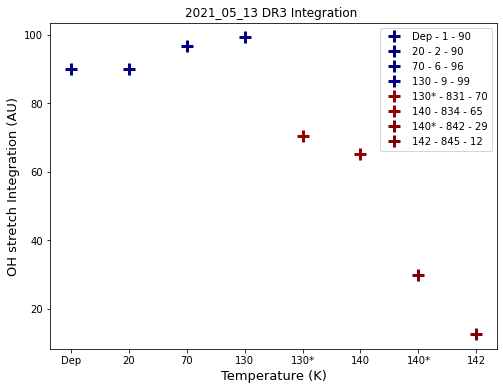

In [2584]:
fig= plt.figure(figsize=(8,6))

for keys, values in Tdictionary.items():

    plt.plot(keys, data_anex_df.iloc[values,28], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,28])))    

plt.title('{0} DR3 Integration '.format(date))
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('OH stretch Integration (AU)').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
plt.legend()


plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-Integration.png'.format(XP, date, date))

plt.show()

#### Dict values

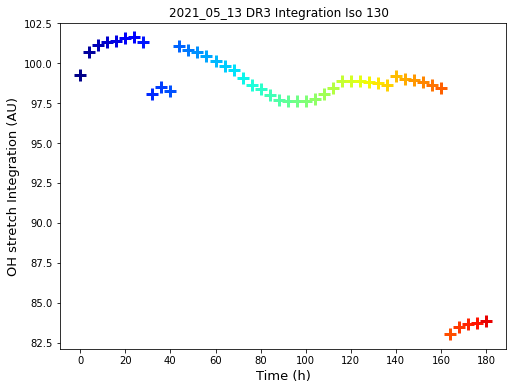

In [2688]:
if Iso == True:   
    
    fig= plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,28], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,28])))    

    plt.title('{0} DR3 Integration Iso {1}  '.format(date, Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('OH stretch Integration (AU)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))  
    #plt.grid()
    #plt.legend()


    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-Integration_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()

## 3.2 <u>Column Density Calculation </u>

### 3.2.1 Theory

To do

![Thick-calc-form-3.svg'](Thick-calc-form-3.svg)

Blabla

![Thick-calc-form-4.svg'](Thick-calc-form-4.svg)

### 3.2.2 Normalisation factor 

In [2586]:
Dep_val_A = data_anex_df['Int_A'].values[0]

Dep_val_C = data_anex_df['Int_C'].values[0]

In [2587]:
Dep_val_A 

90.04664752461284

In [2588]:
Dep_val_C 

6.326076122652829

### 3.3 Optical depth Calcul

### 3.3.A Oh stretch

Aa taken from ref ... Hagen 1981

Find more recent value

In [2589]:
Aa = 2 * 10**(-16)

In [2590]:
NA = Dep_val_A / Aa

In [2591]:
NA

4.502332376230642e+17

### 3.3.B Oh bend

In [2592]:
Ac = 1.2 * 10**(-17)

In [2593]:
NC = Dep_val_C / Ac

In [2594]:
NC

5.2717301022106906e+17

### 3.3.C Comparison and analysis

In [2595]:
comp = NA/NC * 100

In [2596]:
comp

85.40521401773958

### 3.3.E Append to Ice_thickness_df

Prior to the Reduction analysis, the laser-diode thickness notebook should have been performed and a csv being producing with he inputs. We will append the previously obtained data into this csv

In [2597]:
Ice_thickness_df = pd.read_csv('D:\DATA-Processing\PAC\Ice_thickness.csv')

In [2598]:
Ice_thickness_df

,Sample,Date,n1,teta1,d,rate,thickness,Na,Nc
0,ASW,2020_09_15,0.993048,20.146063,339.379075,0.755029,906.035346,4.810000e+17,5.590000e+17
1,ASW,2020_09_16,0.986981,20.275327,341.749008,0.896849,1076.218697,4.795654e+17,5.793533e+17
2,ASW,2020_09_17,1.013398,19.724534,331.677757,6.971830,836.619653,6.757415e+17,4.839162e+17
3,ASW,2020_09_21,1.012572,19.741297,331.983246,0.065403,784.835867,4.434018e+17,4.418921e+17
4,ASW,2020_09_28,1.011625,19.760549,332.334152,0.755904,907.084289,4.327905e+17,5.492510e+17
5,ASW,2020_10_22,1.185651,16.766143,278.705278,0.569413,683.295683,4.814449e+17,3.791857e+17
6,ASW,2020_11_16,0.969877,20.649048,348.623208,1.197077,1436.492762,4.843517e+17,4.927852e+17
7,ASW,2020_11_19,1.032910,19.336941,324.632254,1.064639,1341.444856,5.072321e+17,6.167617e+17
8,ASW,2021_05_13,0.982035,20.381966,343.707107,0.983288,1179.945506,NaN,NaN


In [2599]:
Ice_thickness_df.loc[Ice_thickness_df["Date"] == date, 'Na'] = NA 
Ice_thickness_df.loc[Ice_thickness_df["Date"] == date, 'Nc'] = NC 

In [2600]:
#Ice_thickness_df

In [2601]:
Ice_thickness_df.to_csv('D:\DATA-Processing\PAC\Ice_thickness.csv', index=False)

## 3.3 <u> Normalisation </u>

2 different normalisations
- The 20K sample can be normalised with the first scan (ie the deposition)
- The sample deposited at the higher T needs to be with normalised with respect to the Integration from the normalized scan (3.3?)  

### 20K depositions

For 20K deposition no problem, we take the Integration value of the deposition and normalised through it

Insert if statement: if TRamp[:3] not Nan continue otherwise don`t perform normalisation

In [2602]:
#Dep_val_A

In [2603]:
NormFactor = 100 / Dep_val_A

In [2604]:
NormFactor

1.1105355140808164

 $\color{red}{\text{Append Norm factor into sample thick csv}}$

In [2605]:
dataA_N = dataA_BC_I * NormFactor


Saanity Check:
    
- Insert wavenumber (before export)

In [2606]:
dataA_N.insert(loc = 0,
          column = 'Wavenumber',
          value =  wavelengthA)

dataA_N

,Wavenumber,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,2800.178,3.067311e-05,-0.000239,0.000226,2.602517e-04,2.615113e-04,2.957543e-04,0.000140,0.000156,0.000210,...,3.037557e-05,-9.632360e-19,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000005,6.535354e-06,0.000000,0.000000
1,2800.660,1.439094e-05,-0.000251,0.000235,2.709115e-04,2.660894e-04,3.019251e-04,0.000141,0.000119,0.000159,...,1.487502e-04,1.407624e-04,1.445439e-04,0.000151,0.000153,1.687235e-04,0.000151,1.536175e-04,0.000163,0.000160
2,2801.142,-9.632360e-19,-0.000253,0.000027,7.397994e-05,7.378517e-05,9.961828e-05,0.000002,0.000043,0.000081,...,-9.632360e-19,5.854441e-06,5.770237e-06,0.000008,0.000023,3.400420e-05,0.000000,1.926472e-18,0.000032,0.000017
3,2801.624,4.418981e-05,-0.000199,0.000112,1.292477e-04,1.302986e-04,1.409153e-04,0.000070,0.000024,0.000052,...,1.632192e-04,2.104183e-04,2.080265e-04,0.000198,0.000228,2.381760e-04,0.000190,1.882719e-04,0.000242,0.000218
4,2802.106,7.541301e-05,-0.000166,0.000000,-1.685663e-18,2.408090e-19,-7.224270e-19,0.000000,-0.000037,0.000000,...,4.861682e-05,8.874673e-05,9.302380e-05,0.000066,0.000109,1.154283e-04,0.000064,5.061280e-05,0.000112,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,3998.257,1.224457e-04,0.000118,0.000207,3.602982e-04,3.898747e-04,4.240279e-04,0.000202,0.000396,0.000405,...,5.183462e-04,1.001413e-03,9.603325e-04,0.000917,0.000849,8.496193e-04,0.000927,8.810575e-04,0.000880,0.000872
2486,3998.739,1.589994e-04,0.000156,0.000102,1.787165e-04,1.962089e-04,2.400439e-04,0.000121,0.000209,0.000205,...,5.095064e-04,9.251053e-04,9.107459e-04,0.000875,0.000819,8.460343e-04,0.000875,8.425359e-04,0.000869,0.000840
2487,3999.221,1.748195e-04,0.000187,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.717185e-04,9.889199e-04,1.029081e-03,0.000972,0.000929,9.766831e-04,0.001000,1.010518e-03,0.000995,0.000998
2488,3999.703,4.555923e-05,0.000101,0.000418,8.008980e-04,7.519552e-04,8.012053e-04,0.000035,0.000673,0.000591,...,1.257966e-04,3.164733e-04,3.501141e-04,0.000316,0.000302,3.241089e-04,0.000330,3.428450e-04,0.000325,0.000333


## Export as csv

In [2607]:
dataA_N.to_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR3_{}_A.csv".format(XP,date,date))

## 3.4 <u>Integration II</u> 

Purpose here is to integrate the normalised scan so we can have integration value for scans at higher temperature to use as normalisation value for scans deposited at higherrt temperature

Supress wavenumber

In [2608]:
dataA_N

,Wavenumber,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,2800.178,3.067311e-05,-0.000239,0.000226,2.602517e-04,2.615113e-04,2.957543e-04,0.000140,0.000156,0.000210,...,3.037557e-05,-9.632360e-19,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000005,6.535354e-06,0.000000,0.000000
1,2800.660,1.439094e-05,-0.000251,0.000235,2.709115e-04,2.660894e-04,3.019251e-04,0.000141,0.000119,0.000159,...,1.487502e-04,1.407624e-04,1.445439e-04,0.000151,0.000153,1.687235e-04,0.000151,1.536175e-04,0.000163,0.000160
2,2801.142,-9.632360e-19,-0.000253,0.000027,7.397994e-05,7.378517e-05,9.961828e-05,0.000002,0.000043,0.000081,...,-9.632360e-19,5.854441e-06,5.770237e-06,0.000008,0.000023,3.400420e-05,0.000000,1.926472e-18,0.000032,0.000017
3,2801.624,4.418981e-05,-0.000199,0.000112,1.292477e-04,1.302986e-04,1.409153e-04,0.000070,0.000024,0.000052,...,1.632192e-04,2.104183e-04,2.080265e-04,0.000198,0.000228,2.381760e-04,0.000190,1.882719e-04,0.000242,0.000218
4,2802.106,7.541301e-05,-0.000166,0.000000,-1.685663e-18,2.408090e-19,-7.224270e-19,0.000000,-0.000037,0.000000,...,4.861682e-05,8.874673e-05,9.302380e-05,0.000066,0.000109,1.154283e-04,0.000064,5.061280e-05,0.000112,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,3998.257,1.224457e-04,0.000118,0.000207,3.602982e-04,3.898747e-04,4.240279e-04,0.000202,0.000396,0.000405,...,5.183462e-04,1.001413e-03,9.603325e-04,0.000917,0.000849,8.496193e-04,0.000927,8.810575e-04,0.000880,0.000872
2486,3998.739,1.589994e-04,0.000156,0.000102,1.787165e-04,1.962089e-04,2.400439e-04,0.000121,0.000209,0.000205,...,5.095064e-04,9.251053e-04,9.107459e-04,0.000875,0.000819,8.460343e-04,0.000875,8.425359e-04,0.000869,0.000840
2487,3999.221,1.748195e-04,0.000187,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.717185e-04,9.889199e-04,1.029081e-03,0.000972,0.000929,9.766831e-04,0.001000,1.010518e-03,0.000995,0.000998
2488,3999.703,4.555923e-05,0.000101,0.000418,8.008980e-04,7.519552e-04,8.012053e-04,0.000035,0.000673,0.000591,...,1.257966e-04,3.164733e-04,3.501141e-04,0.000316,0.000302,3.241089e-04,0.000330,3.428450e-04,0.000325,0.000333


In [2609]:
dataA_N = dataA_N.T.iloc[1:].T

In [2610]:
dataA_N

,ASW_2021_05_13_1,ASW_2021_05_13_2,ASW_2021_05_13_3,ASW_2021_05_13_4,ASW_2021_05_13_5,ASW_2021_05_13_6,ASW_2021_05_13_7,ASW_2021_05_13_8,ASW_2021_05_13_9,ASW_2021_05_13_10,...,ASW_2021_05_13_838,ASW_2021_05_13_839,ASW_2021_05_13_840,ASW_2021_05_13_841,ASW_2021_05_13_842,ASW_2021_05_13_843,ASW_2021_05_13_844,ASW_2021_05_13_845,ASW_2021_05_13_846,ASW_2021_05_13_847
0,3.067311e-05,-0.000239,0.000226,2.602517e-04,2.615113e-04,2.957543e-04,0.000140,0.000156,0.000210,0.000206,...,3.037557e-05,-9.632360e-19,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000005,6.535354e-06,0.000000,0.000000
1,1.439094e-05,-0.000251,0.000235,2.709115e-04,2.660894e-04,3.019251e-04,0.000141,0.000119,0.000159,0.000169,...,1.487502e-04,1.407624e-04,1.445439e-04,0.000151,0.000153,1.687235e-04,0.000151,1.536175e-04,0.000163,0.000160
2,-9.632360e-19,-0.000253,0.000027,7.397994e-05,7.378517e-05,9.961828e-05,0.000002,0.000043,0.000081,0.000103,...,-9.632360e-19,5.854441e-06,5.770237e-06,0.000008,0.000023,3.400420e-05,0.000000,1.926472e-18,0.000032,0.000017
3,4.418981e-05,-0.000199,0.000112,1.292477e-04,1.302986e-04,1.409153e-04,0.000070,0.000024,0.000052,0.000066,...,1.632192e-04,2.104183e-04,2.080265e-04,0.000198,0.000228,2.381760e-04,0.000190,1.882719e-04,0.000242,0.000218
4,7.541301e-05,-0.000166,0.000000,-1.685663e-18,2.408090e-19,-7.224270e-19,0.000000,-0.000037,0.000000,0.000000,...,4.861682e-05,8.874673e-05,9.302380e-05,0.000066,0.000109,1.154283e-04,0.000064,5.061280e-05,0.000112,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,1.224457e-04,0.000118,0.000207,3.602982e-04,3.898747e-04,4.240279e-04,0.000202,0.000396,0.000405,0.000436,...,5.183462e-04,1.001413e-03,9.603325e-04,0.000917,0.000849,8.496193e-04,0.000927,8.810575e-04,0.000880,0.000872
2486,1.589994e-04,0.000156,0.000102,1.787165e-04,1.962089e-04,2.400439e-04,0.000121,0.000209,0.000205,0.000202,...,5.095064e-04,9.251053e-04,9.107459e-04,0.000875,0.000819,8.460343e-04,0.000875,8.425359e-04,0.000869,0.000840
2487,1.748195e-04,0.000187,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.717185e-04,9.889199e-04,1.029081e-03,0.000972,0.000929,9.766831e-04,0.001000,1.010518e-03,0.000995,0.000998
2488,4.555923e-05,0.000101,0.000418,8.008980e-04,7.519552e-04,8.012053e-04,0.000035,0.000673,0.000591,0.000557,...,1.257966e-04,3.164733e-04,3.501141e-04,0.000316,0.000302,3.241089e-04,0.000330,3.428450e-04,0.000325,0.000333


In [2611]:
nscan = len(list(dataA_N.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA2 = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA2[iint] = integration(iint+1, dataA_N, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [2612]:
areasBCA2

array([100.        , 100.07503505, 105.44789598, 106.87901164,
       107.19312267, 107.41241598, 108.23949069, 109.8978362 ,
       110.22333488, 110.45556066, 110.65492336, 110.8158571 ,
       110.95699835, 111.16451646, 111.16954882, 111.22595739,
       111.37717667, 111.42095486, 111.40033871, 111.52417298,
       111.61235121, 111.70862881, 111.7295908 , 111.80359704,
       111.80740489, 111.76249221, 111.89566916, 111.84357034,
       112.1411884 , 112.09561023, 112.13208215, 112.08225342,
       112.20527912, 112.24463199, 112.2309522 , 112.25748384,
       112.23568962, 112.21023076, 112.21086581, 112.30132887,
       112.32083887, 112.34078807, 112.35569885, 112.36844869,
       112.32736181, 112.24504699, 112.35084628, 112.36712059,
       112.30964667, 112.38784861, 112.41043477, 112.4154434 ,
       112.38392042, 112.34920763, 112.47966933, 112.45574498,
       112.43945152, 112.43457454, 112.50048501, 112.52605834,
       112.47201523, 112.51457525, 112.54279099, 112.56

In [2613]:
areasBCA2_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_N_A': areasBCA2[:]})
areasBCA2_df = areasBCA2_df.T.iloc[1:].T
areasBCA2_df = areasBCA2_df.reset_index()
areasBCA2_df['Name'] = areasBCA2_df['index']
areasBCA2_df= areasBCA2_df.T.iloc[1:].T

In [2614]:
#areasBCA2_df

In [2615]:
data_anex_df = pd.merge(data_anex_df, areasBCA2_df, on="Name")

### High Temperature deposition

For the higher temperature deposited, normalising through the deposition would not allowed a good comparison with the sample deposited at 20K. Hence, we will make an average of the normalised value (from Integration II) at the temperature of interest and use this value as a normalisation factor.<br>

We will use a separate notebook to to that that will run separately if need be

In [2616]:
if(T_ramp_df.iloc[0,2]==numpy.nan):
    
    %run -i "test2.py"
    
    print("your code here")
    
else:
    print('bite')
    


bite


# <span style='background :yellow' > $\color{green}{\text{DR4 : Cleaning and error analysis}}$ </span>

## 4.1 Export data_Anex as csv

## Insert time column

Even if all sample don`t require a time stamp, for future concatenation it is import that all the data has same shape

For loop iterate through scan number if scan number = input manually time in column, else = ''

Insert manually for now

In [2617]:
#data_anex_df

In [2618]:
data_anex_df.to_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date,date), index=False)

# 5. Sample specific reduction

Link toward peculiar cases

- 02_09

## 02_09

## 4.2 Export result in web-page

All the output are inserted onto a blank ? web page

### Common feature

In [2619]:
f = open("D:\DATA-Processing\PAC\{}/Samples/{}/{}_DP.html".format(XP,date,date),'a')



message = """<html>
<head></head>
<body>

<h1>Data Reduction results</h1>

<p>Reduction performed:"""+str(date_jour) + """</p>

<h2>Full scan unreduced</h2>

<figure>
<a href="Plots\DR\DR1_"""+str(date) + """_Full-range.png" target="_blank"><image src="Plots\DR\DR1_"""+str(date) + """_Full-range.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>

<h2>Baseline corrected scan A</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_A.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_A.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>

<h2>Baseline corrected scan B</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_B.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_B.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>


<h2>Baseline corrected scan C</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_C.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_C.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>


<h2>Range A frequency shift</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_PeakA-frequency_wA0.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_PeakA-frequency_wA0.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>

<h2>Range A Integration</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_PeakA-Integration.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_PeakA-Integration.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>

<h2>Range B frequency shift</h2>

<figure>
<a href="Plots\DR\DR2_"""+str(date) + """_PeakB-frequency.png" target="_blank"><image src="Plots\DR\DR2_"""+str(date) + """_PeakB-frequency.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>



</body>
</html>"""




f.write(message)
f.close()

### Specific feature

#### Isotherms

In [2689]:
if Iso == True:   
    
    f = open("D:\DATA-Processing\PAC\{}/Samples/{}/{}_DP.html".format(XP,date,date),'a')



    message = """<html>
    <head></head>
    <body>

    <h1>Isotherms</h1>

    <h2> """+str(Tiso1) + """ </h2>
    
    <article id="P1">
    
    <div>
    
    <h3>Peak frequency shift </h3>

    <figure>
    <a href="Plots/DR/DR2_"""+str(date) + """_PeakA-frequency_Iso_"""+str(Tiso1) + """.png" target="_blank"><image src="Plots/DR/DR2_"""+str(date) + """_PeakA-frequency_Iso_"""+str(Tiso1) + """.png" width=""  Id=""  alt=""/></a>      
    <figcaption></figcaption>
    </figure>

    <p>Output</p>

    </div>
    
    <div>
    
    <h3>Integration </h3>

    <figure>
    <a href="Plots/DR/DR2_"""+str(date) + """_PeakA-Integration_Iso_"""+str(Tiso1) + """.png" target="_blank"><image src="Plots/DR/DR2_"""+str(date) + """_PeakA-Integration_Iso_"""+str(Tiso1) + """.png" width=""  Id=""  alt=""/></a>      
    <figcaption></figcaption>
    </figure>

    <p>Output</p>

    </div>



    </article>




    </body>
    </html>"""




    f.write(message)
    f.close()